# Description

It takes TWAS results on a random phenotype and verifies that the QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
GLS_NULL_SIMS_DIR <- Sys.getenv("PHENOPLIER_RESULTS_GLS_NULL_SIMS")

In [4]:
GLS_NULL_SIMS_DIR

[1] "/opt/data/results/gls/null_sims"

In [5]:
SPREDIXCAN_DIR <- file.path(GLS_NULL_SIMS_DIR, "twas", "spredixcan")

In [6]:
SPREDIXCAN_DIR

[1] "/opt/data/results/gls/null_sims/twas/spredixcan"

In [7]:
SMULTIXCAN_DIR <- file.path(GLS_NULL_SIMS_DIR, "twas", "smultixcan")

In [8]:
SMULTIXCAN_DIR

[1] "/opt/data/results/gls/null_sims/twas/smultixcan"

# Random pheno 0

## S-PrediXcan

### Load data

In [9]:
twas <- as.data.frame(read_csv(file.path(SPREDIXCAN_DIR, "random.pheno0-gtex_v8-mashr-Whole_Blood.csv")))

Rows: 12105 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, gene_name
dbl (8): zscore, pvalue, var_g, n_snps_used, n_snps_in_cov, n_snps_in_model,...
lgl (4): effect_size, pred_perf_r2, pred_perf_pval, pred_perf_qval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
dim(twas)

[1] 12105    14

In [11]:
head(twas)

,gene,gene_name,zscore,effect_size,pvalue,var_g,pred_perf_r2,pred_perf_pval,pred_perf_qval,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000131236.16,CAP1,-3.937350,NA,8.238639e-05,8.369900e-05,NA,NA,NA,1,1,1,8.238639e-05,0.021593099
2,ENSG00000130787.13,HIP1R,3.898416,NA,9.682382e-05,3.039669e-03,NA,NA,NA,2,2,2,1.518158e-03,0.087495094
3,ENSG00000103018.16,CYB5B,3.518510,NA,4.339773e-04,6.455623e-03,NA,NA,NA,1,1,1,4.339773e-04,0.114290756
4,ENSG00000117906.13,RCN2,3.469550,NA,5.213312e-04,5.848182e-07,NA,NA,NA,1,1,1,5.213312e-04,0.001695604
5,ENSG00000131941.7,RHPN2,3.398764,NA,6.769101e-04,4.979041e-03,NA,NA,NA,1,1,1,6.769101e-04,0.106736982
6,ENSG00000135469.13,COQ10A,3.381205,NA,7.216872e-04,4.312235e-04,NA,NA,NA,2,2,2,1.299779e-02,0.064459900


### QQ-plot

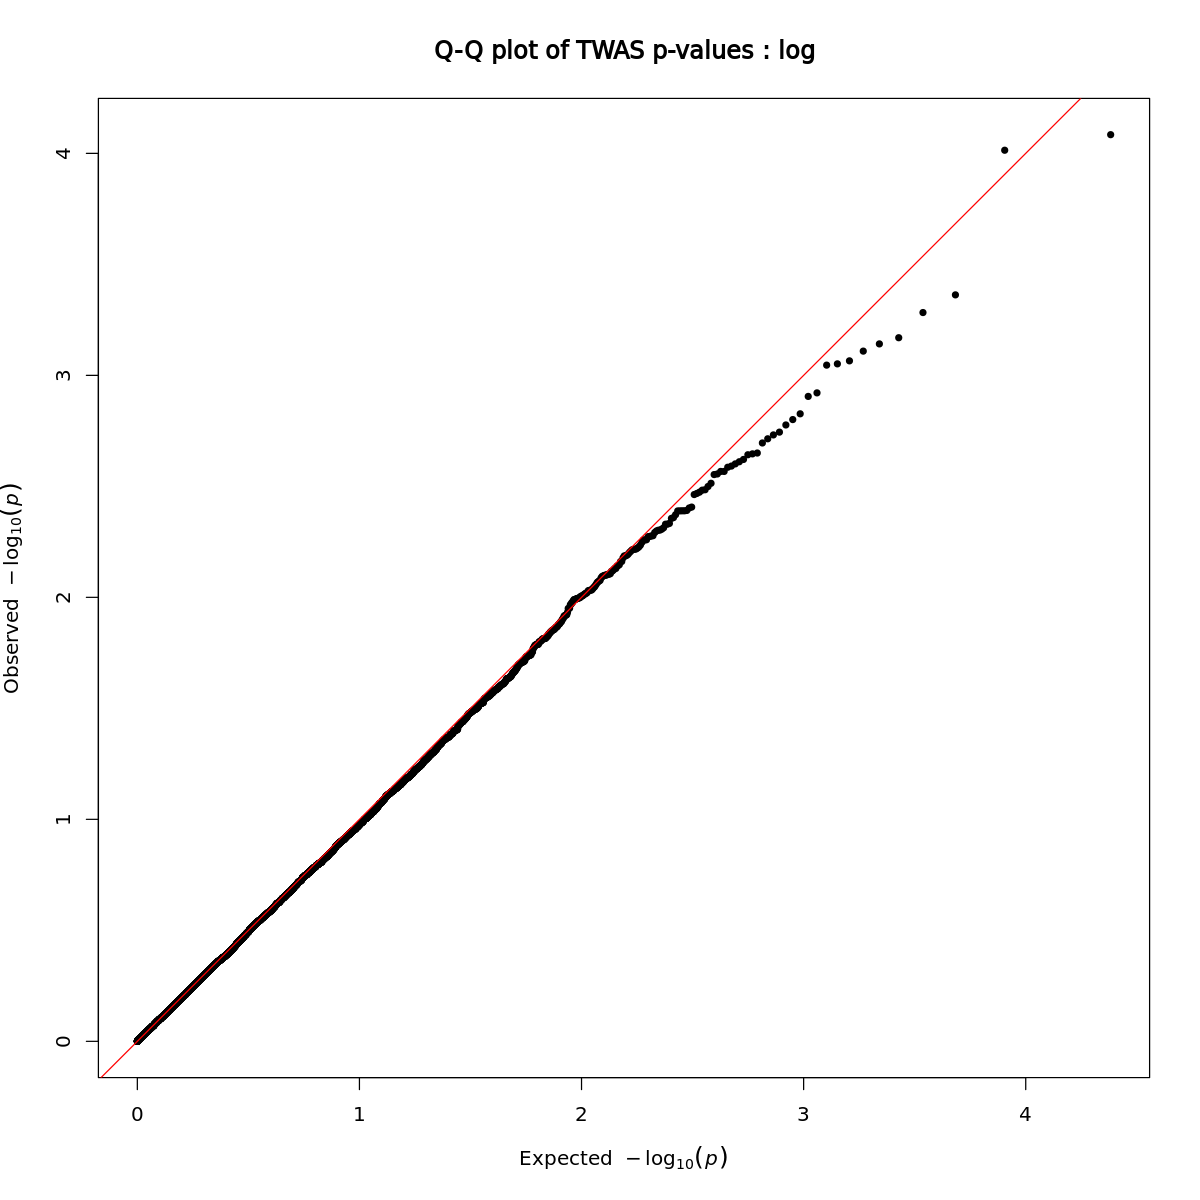

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = "Q-Q plot of TWAS p-values : log")

## S-MultiXcan

### Load data

In [13]:
twas <- as.data.frame(read_table(file.path(SMULTIXCAN_DIR, "random.pheno0-gtex_v8-mashr-smultixcan.txt")))


── Column specification ────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  gene_name = col_character(),
  pvalue = col_double(),
  n = col_double(),
  n_indep = col_double(),
  p_i_best = col_double(),
  t_i_best = col_character(),
  p_i_worst = col_double(),
  t_i_worst = col_character(),
  eigen_max = col_double(),
  eigen_min = col_double(),
  eigen_min_kept = col_double(),
  z_min = col_double(),
  z_max = col_double(),
  z_mean = col_double(),
  z_sd = col_double(),
  tmi = col_double(),
  status = col_double()
)



In [14]:
dim(twas)

[1] 22318    18

In [15]:
head(twas)

,gene,gene_name,pvalue,n,n_indep,p_i_best,t_i_best,p_i_worst,t_i_worst,eigen_max,eigen_min,eigen_min_kept,z_min,z_max,z_mean,z_sd,tmi,status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000131941.7,RHPN2,3.244170e-05,48,3,1.818133e-04,Artery_Tibial,9.943325e-01,Brain_Nucleus_accumbens_basal_ganglia,36.55643,7.692089e-16,2.5197011,-2.749265,3.743032,1.2987605,1.842844,3,0
2,ENSG00000076650.6,GPATCH1,6.208957e-05,40,3,3.887285e-04,Artery_Coronary,8.172200e-01,Brain_Frontal_Cortex_BA9,29.99021,2.086487e-15,1.8152028,-3.547620,2.393104,-2.0405599,1.733145,3,0
3,ENSG00000100906.10,NFKBIA,7.618009e-05,1,1,7.618009e-05,Brain_Frontal_Cortex_BA9,7.618009e-05,Brain_Frontal_Cortex_BA9,1.00000,1.000000e+00,1.0000000,-3.956110,-3.956110,-3.9561100,NA,1,0
4,ENSG00000136319.11,TTC5,9.011204e-05,47,5,1.262392e-03,Brain_Hippocampus,9.618541e-01,Colon_Sigmoid,21.27244,8.142339e-16,0.7326062,-3.224395,1.401017,-0.9239872,1.077539,5,0
5,ENSG00000152990.13,ADGRA3,9.756238e-05,41,12,2.089853e-07,Heart_Atrial_Appendage,6.532914e-01,Whole_Blood,12.98825,3.499412e-16,0.4446823,-5.191162,3.643340,-0.4715058,2.341121,12,0
6,ENSG00000186272.12,ZNF17,1.228915e-04,49,5,6.902953e-05,Vagina,9.989149e-01,Brain_Hippocampus,27.64499,6.132055e-16,0.9746593,-2.525295,3.979606,0.2550687,1.729794,5,0


### QQ-plot

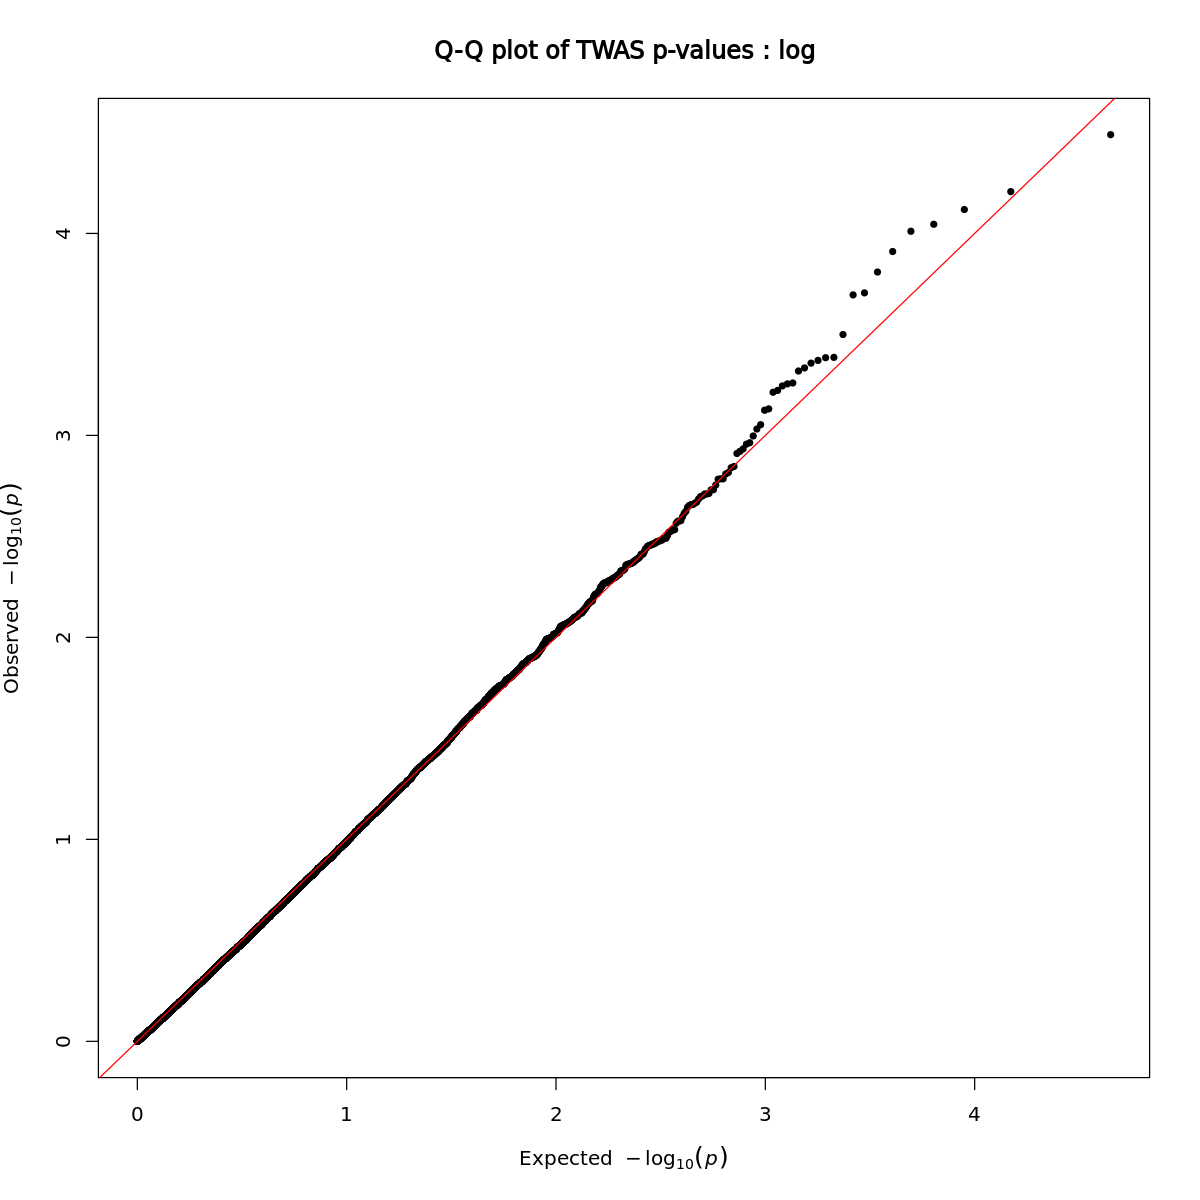

In [16]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = "Q-Q plot of TWAS p-values : log")

# Random pheno 28

Random phenotype 28 has the largest inflation factor in the original GWAS summary stats (although within the acceptable limits).

## S-PrediXcan

### Load data

In [17]:
twas <- as.data.frame(read_csv(file.path(SPREDIXCAN_DIR, "random.pheno28-gtex_v8-mashr-Whole_Blood.csv")))

Rows: 12107 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, gene_name
dbl (8): zscore, pvalue, var_g, n_snps_used, n_snps_in_cov, n_snps_in_model,...
lgl (4): effect_size, pred_perf_r2, pred_perf_pval, pred_perf_qval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
dim(twas)

[1] 12107    14

In [19]:
head(twas)

,gene,gene_name,zscore,effect_size,pvalue,var_g,pred_perf_r2,pred_perf_pval,pred_perf_qval,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000139163.15,ETNK1,3.682490,NA,0.0002309668,0.0011560362,NA,NA,NA,1,1,1,0.0002309668,0.11309991
2,ENSG00000107593.16,PKD2L1,3.585639,NA,0.0003362537,0.1750414869,NA,NA,NA,2,2,2,0.0003362526,1.39688624
3,ENSG00000144597.13,EAF1,-3.520220,NA,0.0004311889,0.0053709545,NA,NA,NA,1,1,1,0.0004311889,0.10551263
4,ENSG00000204435.13,CSNK2B,3.462200,NA,0.0005357783,0.0008986979,NA,NA,NA,2,2,2,0.0005414806,0.04540095
5,ENSG00000075568.16,TMEM131,-3.459465,NA,0.0005412504,0.0079874499,NA,NA,NA,2,2,2,0.0029655887,0.08806079
6,ENSG00000180398.11,MCFD2,3.439310,NA,0.0005831982,0.0481735795,NA,NA,NA,3,3,3,0.0006218746,0.32364230


### QQ-plot

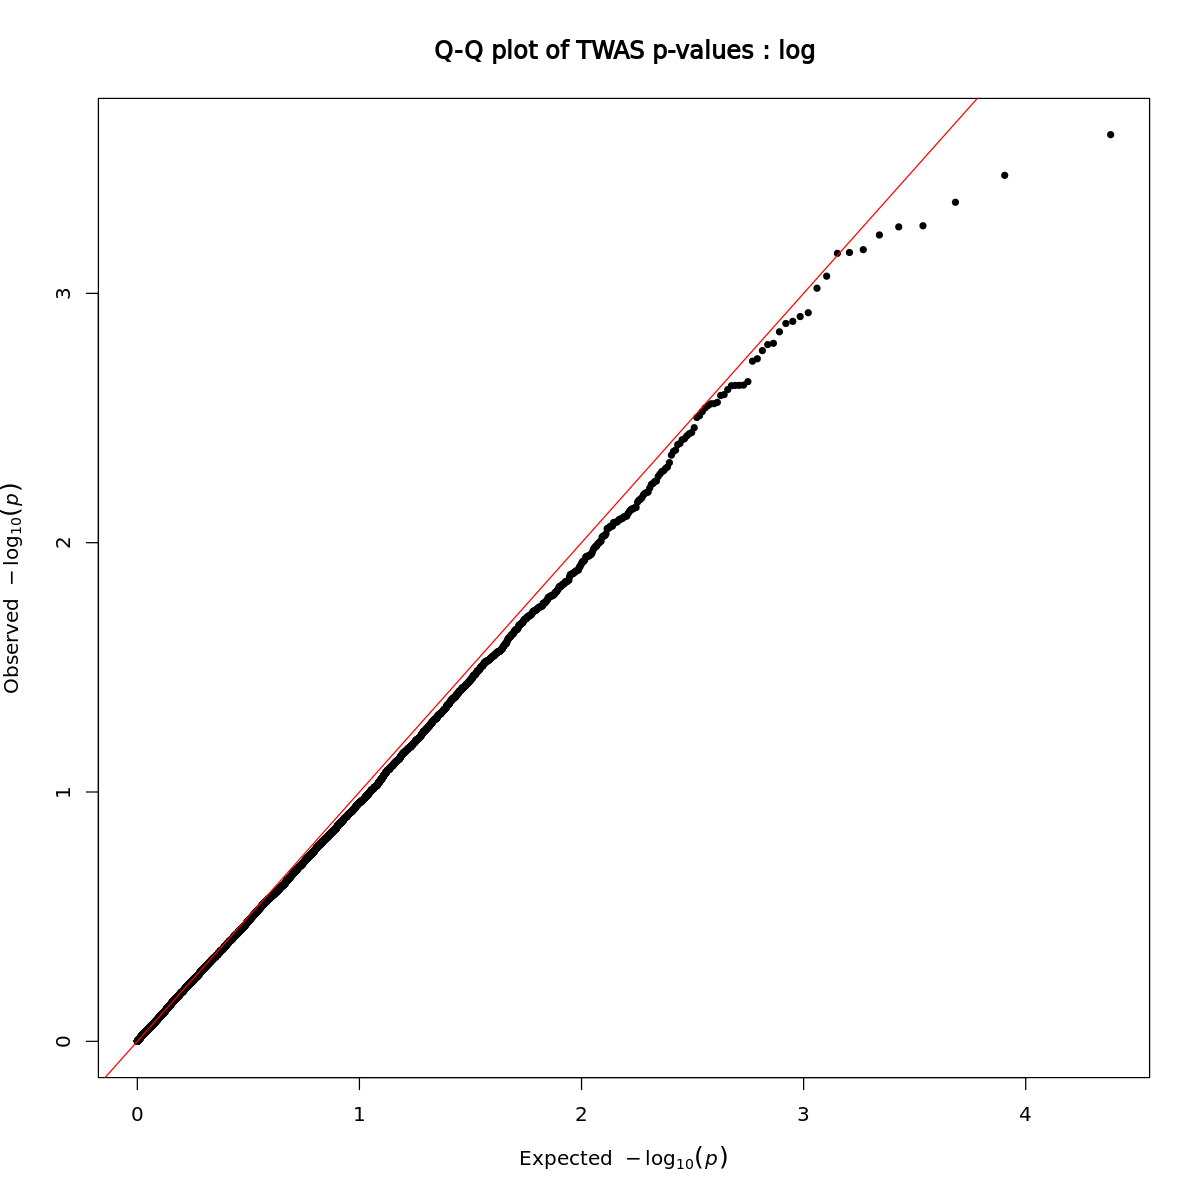

In [20]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = "Q-Q plot of TWAS p-values : log")

## S-MultiXcan

### Load data

In [21]:
twas <- as.data.frame(read_table(file.path(SMULTIXCAN_DIR, "random.pheno28-gtex_v8-mashr-smultixcan.txt")))


── Column specification ────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  gene_name = col_character(),
  pvalue = col_double(),
  n = col_double(),
  n_indep = col_double(),
  p_i_best = col_double(),
  t_i_best = col_character(),
  p_i_worst = col_double(),
  t_i_worst = col_character(),
  eigen_max = col_double(),
  eigen_min = col_double(),
  eigen_min_kept = col_double(),
  z_min = col_double(),
  z_max = col_double(),
  z_mean = col_double(),
  z_sd = col_double(),
  tmi = col_double(),
  status = col_double()
)



In [22]:
dim(twas)

[1] 22317    18

In [23]:
head(twas)

,gene,gene_name,pvalue,n,n_indep,p_i_best,t_i_best,p_i_worst,t_i_worst,eigen_max,eigen_min,eigen_min_kept,z_min,z_max,z_mean,z_sd,tmi,status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000160951.3,PTGER1,2.292151e-05,39,3,9.972450e-06,Brain_Hippocampus,6.678219e-01,Brain_Nucleus_accumbens_basal_ganglia,24.695116,6.315868e-16,2.0124255,-1.8799291,4.417770,-0.6102095,1.2148182,3,0
2,ENSG00000225386.1,AC099754.1,5.904289e-05,2,2,3.203580e-05,Brain_Caudate_basal_ganglia,1.097784e-01,Muscle_Skeletal,1.029545,9.704554e-01,0.9704554,-4.1584902,1.599190,-1.2796501,4.0712947,2,0
3,ENSG00000237874.2,RP3-393K13.1,9.647913e-05,1,1,9.647913e-05,Testis,9.647913e-05,Testis,1.000000,1.000000e+00,1.0000000,-3.8992801,-3.899280,-3.8992801,NA,1,0
4,ENSG00000270607.1,RP11-359E10.1,1.069873e-04,32,6,8.295571e-04,Brain_Caudate_basal_ganglia,9.053607e-01,Adrenal_Gland,21.515834,1.846447e-16,0.8953397,-0.7976454,3.342740,2.0482840,1.1360398,6,0
5,ENSG00000174348.13,PODN,1.822994e-04,48,5,2.120971e-05,Thyroid,6.850873e-01,Brain_Cortex,37.240791,1.327792e-15,1.2894537,-4.2517600,1.494039,-1.0563838,0.8284165,5,0
6,ENSG00000204389.9,HSPA1A,1.952262e-04,9,3,5.574129e-05,Brain_Cerebellar_Hemisphere,1.884572e-01,Cells_Cultured_fibroblasts,7.451492,5.527330e-17,0.6011881,-4.0301499,2.081060,-3.0494607,2.1231554,3,0


### QQ-plot

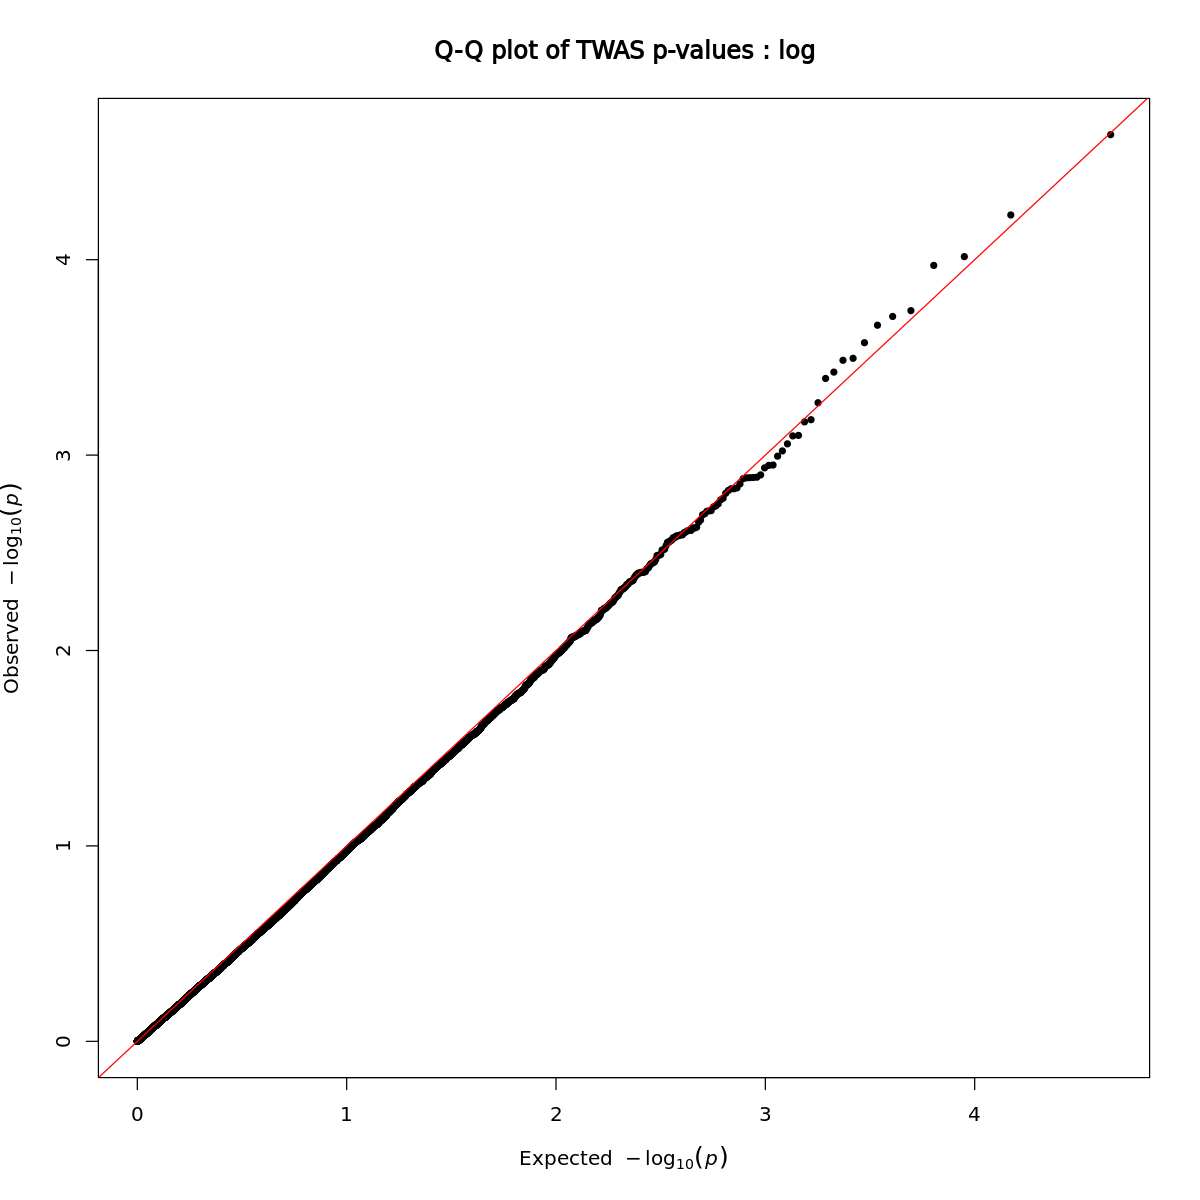

In [24]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = "Q-Q plot of TWAS p-values : log")